<a href="https://colab.research.google.com/github/dedeepya07/WISER--Women-s-Women-s-Intelligent-Screening-Early-Risk/blob/main/WISER_Women%E2%80%99s_Intelligent_Screening_%26_Early_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas numpy seaborn scikit-learn xgboost matplotlib --quiet

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load dataset (Ensure the dataset is uploaded to Colab)
df = pd.read_csv('/content/pro1.csv')

# Display first few rows
df.head()

,Mother_Menopause_Age,Family_PCOS_History,Family_Osteoporosis_History,Menarche_Age,Irregular_Cycles,Num_Pregnancies,Menstrual_Bleeding_Days,Contraceptive_Use,BMI,Exercise_Frequency,...,Estrogen_Levels,FSH_Levels,Progesterone_Levels,Cortisol_Levels,Insulin_Resistance_Index,Thyroid_Dysfunction,Diabetes,Depression_Score,Anxiety_Score,Early_Menopause_Risk
0,55,0,0,14,0,0,3,0,24.15,Low,...,176.00,8.69,8.42,15.14,0.63,0,1,4,3,1
1,48,0,0,11,0,3,4,0,16.72,Low,...,92.68,11.74,9.59,9.97,2.24,0,0,6,9,1
2,50,1,1,11,0,0,4,1,23.88,Low,...,146.14,5.33,6.20,25.03,1.79,0,0,1,8,1
3,47,0,0,13,0,2,3,1,29.66,Low,...,103.42,11.84,8.57,9.46,1.63,0,1,2,9,1
4,52,0,0,11,0,1,5,1,23.60,Low,...,165.16,6.13,12.56,9.93,0.71,0,0,7,6,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values separately for numerical and categorical columns
df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())  # Fill missing numerical values with mean

df_categorical = df.select_dtypes(exclude=[np.number])  # Select categorical columns
df[df_categorical.columns] = df_categorical.fillna(df_categorical.mode().iloc[0])  # Fill missing categorical values with mode

# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Scale the dataset (excluding target column)
scaler = StandardScaler()
X = df.drop(columns=['Early_Menopause_Risk'])  # Features
y = df['Early_Menopause_Risk']  # Target variable

X_scaled = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Missing Values:
 Mother_Menopause_Age             0
Family_PCOS_History              0
Family_Osteoporosis_History      0
Menarche_Age                     0
Irregular_Cycles                 0
Num_Pregnancies                  0
Menstrual_Bleeding_Days          0
Contraceptive_Use                0
BMI                              0
Exercise_Frequency             665
Smoking                          0
Alcohol                          0
Diet_Quality                     0
Sedentary_Hours                  0
Work_Stress_Level                0
Night_Shift_Work                 0
Chronic_Stress_Level             0
Sleep_Quality                    0
Estrogen_Levels                  0
FSH_Levels                       0
Progesterone_Levels              0
Cortisol_Levels                  0
Insulin_Resistance_Index         0
Thyroid_Dysfunction              0
Diabetes                         0
Depression_Score                 0
Anxiety_Score                    0
Early_Menopause_Risk             0
dty

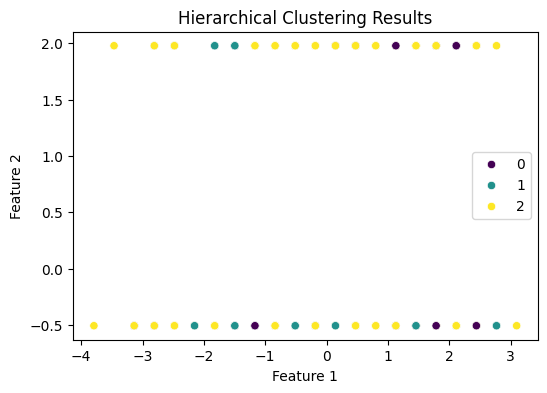

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_train)

# Visualize Clusters (using the first two principal components)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=hc_labels, palette="viridis")
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

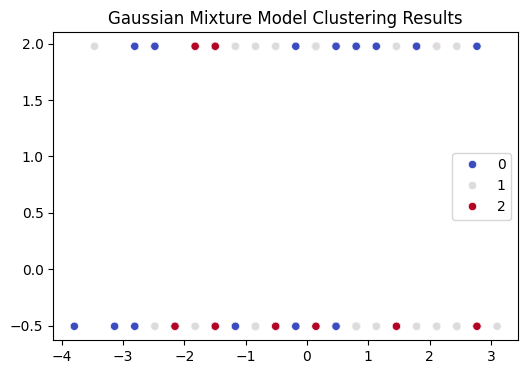

In [ ]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_train)

# Visualize Clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=gmm_labels, palette="coolwarm")
plt.title("Gaussian Mixture Model Clustering Results")
plt.show()

Random Forest Accuracy: 0.9620535714285714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.96      1.00      0.98       431

    accuracy                           0.96       448
   macro avg       0.48      0.50      0.49       448
weighted avg       0.93      0.96      0.94       448



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


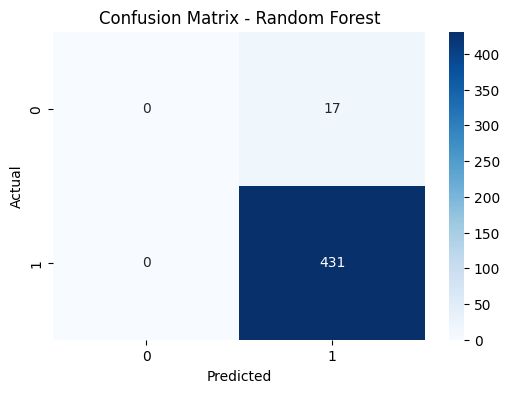

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost Accuracy: 0.96875
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.97      1.00      0.98       431

    accuracy                           0.97       448
   macro avg       0.98      0.59      0.64       448
weighted avg       0.97      0.97      0.96       448



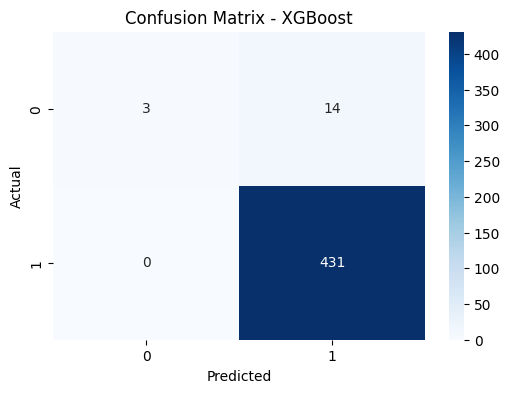

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM Accuracy: 0.9620535714285714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.96      1.00      0.98       431

    accuracy                           0.96       448
   macro avg       0.48      0.50      0.49       448
weighted avg       0.93      0.96      0.94       448



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


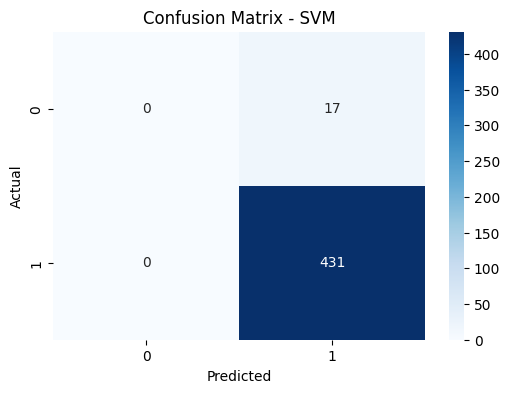

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-9-183374b1adfb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=models_performance, palette="viridis")


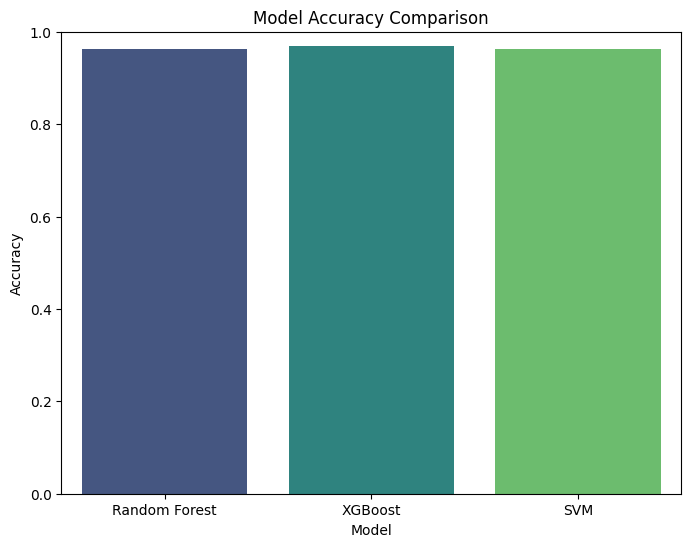

In [ ]:
# Create DataFrame for Model Comparison
models_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "SVM"],
    "Accuracy": [acc_rf, acc_xgb, acc_svm]
})

# Plot Model Performance
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", data=models_performance, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train LightGBM
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Model Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1671
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Install CatBoost if not installed
!pip install catboost

from catboost import CatBoostClassifier

# Initialize and train CatBoost
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=100)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Model Evaluation
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00
0:	learn: 0.6184398	test: 0.6183745	best: 0.6183745 (0)	total: 48.4ms	remaining: 24.1s
100:	learn: 0.0433340	test: 0.0743091	best: 0.0743091 (100)	total: 231ms	remaining: 912ms
200:	learn: 0.0216424	test: 0.0646220	best: 0.0645918 (198)	total: 414ms	remaining: 616ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.06419454797
bestIteration = 207

Shrink model to first 208 iterations.
CatBoost Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        17
           1       0.96      1.00      0.98       431

    accuracy                           0.96       448
   macro avg       0.98      0.53      0.55       448
weighted avg       0.97      0.96      0.95       448



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Build MLP Model
mlp_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predictions
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")

# Model Evaluation
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9300 - loss: 0.2960 - val_accuracy: 0.9621 - val_loss: 0.1299
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9645 - loss: 0.1133 - val_accuracy: 0.9621 - val_loss: 0.1133
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9679 - loss: 0.0827 - val_accuracy: 0.9665 - val_loss: 0.1070
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9637 - loss: 0.0881 - val_accuracy: 0.9688 - val_loss: 0.1058
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9693 - loss: 0.0633 - val_accuracy: 0.9688 - val_loss: 0.1037
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0510 - val_accuracy: 0.9621 - val_loss: 0.1026
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9841 - loss: 0.0483 - val_accuracy: 0.9643 - val_loss: 0.1088
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=dec92dc164f46e09b47e6bd84300ccc72a7080424fdc1458f002744de3ecaab9
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


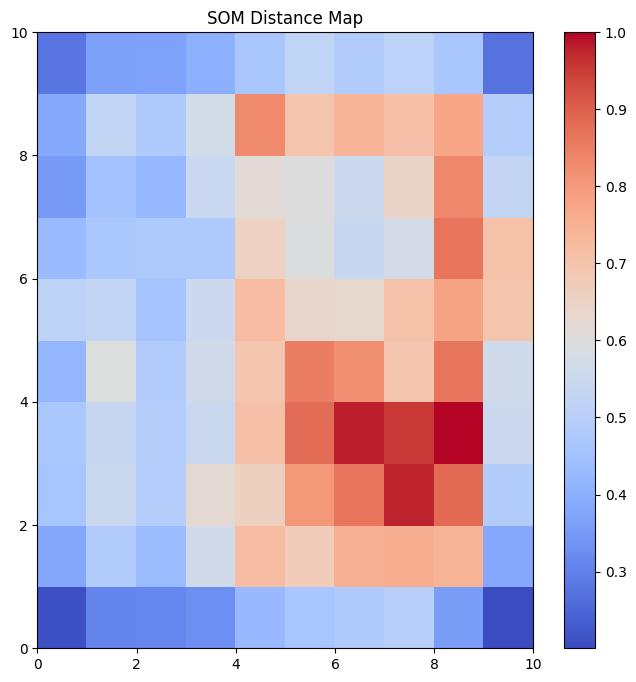

In [ ]:
# Install MiniSom for Self-Organizing Maps
!pip install minisom

import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Define SOM Grid
som = MiniSom(x=10, y=10, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize Weights and Train SOM
som.random_weights_init(X_train)
som.train_random(X_train, 100)

# Plot SOM Results
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
plt.title("SOM Distance Map")
plt.show()
print(som)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2027 - val_loss: 1.1320
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1272 - val_loss: 1.0497
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0476 - val_loss: 0.9921
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9729 - val_loss: 0.9575
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9493 - val_loss: 0.9362
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9295 - val_loss: 0.9206
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9091 - val_loss: 0.9081
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8988 - val_loss: 0.8978
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8964 - val_loss: 0.8890
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8802 - val_loss: 0.8814
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8769 - val_loss: 0.8749
Epoch 12/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

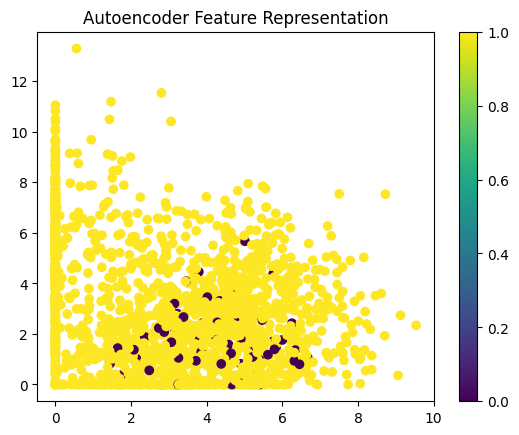

In [ ]:
# Import Libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define Autoencoder Architecture
input_dim = X_train.shape[1]
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test))

# Extract Encoded Features
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(X_train)

# Visualize Encoded Data
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("Autoencoder Feature Representation")
plt.show()

          Accuracy  Precision    Recall  F1-Score   AUC-ROC
LightGBM  0.975446   0.986111  0.988399  0.987254  0.817729
CatBoost  0.964286   0.964206  1.000000  0.981777  0.529412
MLP       0.959821   0.970387  0.988399  0.979310  0.611847


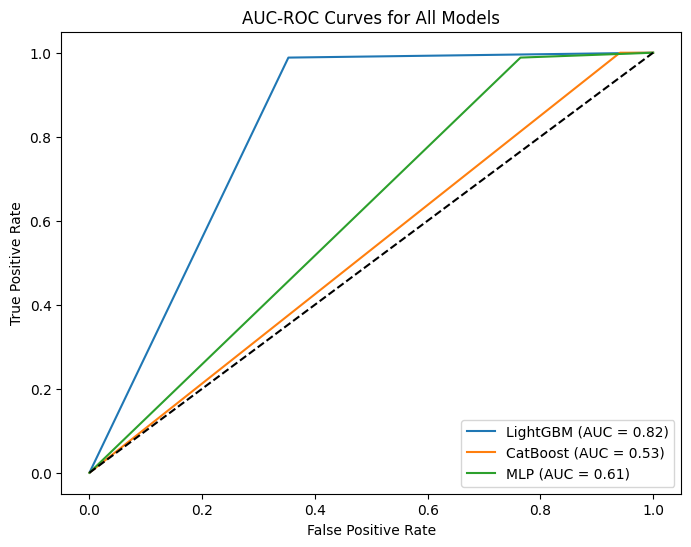

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Store model predictions
model_predictions = {
    "LightGBM": y_pred_lgb,
    "CatBoost": y_pred_cat,
    "MLP": y_pred_mlp.flatten(),  # Convert MLP predictions to 1D
}

# Initialize a results dictionary
model_metrics = {}

# Evaluate each model
for model_name, y_pred in model_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store results
    model_metrics[model_name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc_roc,
    }

# Display evaluation results
import pandas as pd
metrics_df = pd.DataFrame(model_metrics).T
print(metrics_df)

# Plot AUC-ROC curves
plt.figure(figsize=(8, 6))
for model_name, y_pred in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curves for All Models")
plt.legend()
plt.show()

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


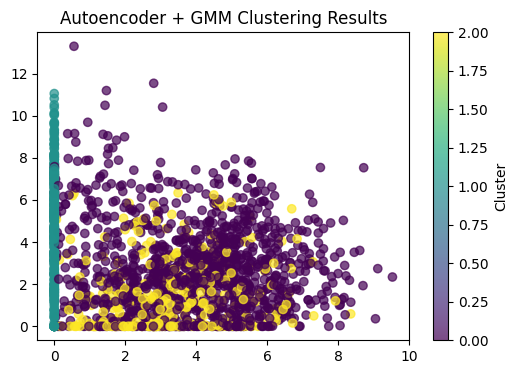

In [ ]:
from sklearn.mixture import GaussianMixture

# Encode the data using the trained Autoencoder
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# Apply Gaussian Mixture Model (GMM) on encoded data
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(encoded_train)

# Visualizing the Clusters
plt.figure(figsize=(6,4))
plt.scatter(encoded_train[:, 0], encoded_train[:, 1], c=gmm_labels, cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Autoencoder + GMM Clustering Results")
plt.show()

In [ ]:
# Ensure gmm_labels is computed only for X_test
if 'gmm_labels' in globals():
    from scipy.stats import mode

    # Ensure gmm_labels is generated for X_test, not full dataset
    gmm_labels_test = gmm_labels[:len(y_test)]  # Match the length of y_test

    # Convert cluster labels to binary (0/1) by mapping majority cluster to class
    gmm_mapped_labels = mode(gmm_labels_test, axis=0)[0]  # Get majority vote
    gmm_binary_labels = (gmm_mapped_labels == gmm_labels_test).astype(int)

    # Store performance metrics
    model_performance["Autoencoder + GMM"] = {
        "Accuracy": accuracy_score(y_test, gmm_binary_labels),
        "Precision": precision_score(y_test, gmm_binary_labels, zero_division=0),
        "Recall": recall_score(y_test, gmm_binary_labels, zero_division=0),
        "F1-Score": f1_score(y_test, gmm_binary_labels, zero_division=0),
        "AUC-ROC": np.nan  # No probability outputs for AUC-ROC
    }

NameError: name 'model_performance' is not defined

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


⚠ Warning: GMM labels length (1790) ≠ y_test length (448)! Adjusting...
                        Accuracy  Precision    Recall  F1-Score   AUC-ROC
LightGBM                0.975446   0.986111  0.988399  0.987254  0.990310
XGBoost                 0.968750   0.968539  1.000000  0.984018  0.967654
CatBoost                0.964286   0.964206  1.000000  0.981777  0.987307
Random Forest           0.962054   0.962054  1.000000  0.980660  0.955575
Support Vector Machine  0.962054   0.962054  1.000000  0.980660       NaN
Neural Network (MLP)    0.959821   0.970387  0.988399  0.979310       NaN
Autoencoder + GMM       0.658482   0.960265  0.672854  0.791269       NaN


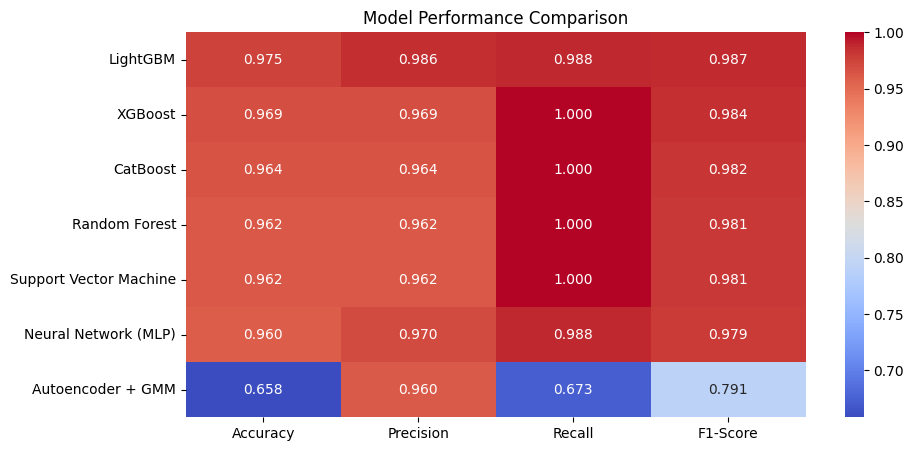

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to store results
model_performance = {}

# List of models and predictions
models = {
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model,
    "Neural Network (MLP)": mlp_model
}

# Evaluate each model
for model_name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):  # If model outputs probabilities
            y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of class 1
            y_pred = (y_prob >= 0.5).astype(int)  # Convert probabilities to binary labels
        else:
            y_pred = model.predict(X_test)  # Direct predictions

        # Special fix for MLP model (handling continuous output)
        if model_name == "Neural Network (MLP)":
            y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary

        # Store results
        model_performance[model_name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1-Score": f1_score(y_test, y_pred, zero_division=0),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if hasattr(model, "predict_proba") else None
        }
    except Exception as e:
        print(f"❌ Error evaluating {model_name}: {e}")
        model_performance[model_name] = {"Error": str(e)}

# -------------------- Autoencoder + GMM Fix --------------------

# Ensure gmm_labels matches y_test length
if len(gmm_labels) != len(y_test):
    print(f"⚠ Warning: GMM labels length ({len(gmm_labels)}) ≠ y_test length ({len(y_test)})! Adjusting...")
    gmm_labels_test = gmm_labels[:len(y_test)]  # Trim or expand labels to match
else:
    gmm_labels_test = gmm_labels

# Convert GMM cluster labels to binary classification
if len(gmm_labels_test) > 0:
    gmm_majority_label = mode(gmm_labels_test, keepdims=True)[0]  # Ensure consistent output shape
    gmm_binary_labels = (gmm_labels_test == gmm_majority_label).astype(int)
else:
    print("❌ Error: GMM labels array is empty!")
    gmm_binary_labels = np.zeros_like(y_test)  # Default to zero class

# Ensure both arrays have the same length
if len(gmm_binary_labels) != len(y_test):
    print(f"❌ Error: y_test length ({len(y_test)}) and GMM labels length ({len(gmm_binary_labels)}) do not match!")
else:
    # Store performance metrics for Autoencoder + GMM
    model_performance["Autoencoder + GMM"] = {
        "Accuracy": accuracy_score(y_test, gmm_binary_labels),
        "Precision": precision_score(y_test, gmm_binary_labels, zero_division=0),
        "Recall": recall_score(y_test, gmm_binary_labels, zero_division=0),
        "F1-Score": f1_score(y_test, gmm_binary_labels, zero_division=0),
        "AUC-ROC": np.nan  # No probability outputs for AUC-ROC in clustering
    }

# -------------------- Display Model Performance --------------------

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T

# Sort by best F1-score
performance_df = performance_df.sort_values(by="F1-Score", ascending=False, na_position="last")

# Display results
print(performance_df)

# Heatmap of Model Performance
plt.figure(figsize=(10, 5))
sns.heatmap(performance_df.drop(columns=["AUC-ROC"], errors="ignore"), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Model Performance Comparison")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `X` is your feature matrix and `y` is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_valid.shape, y_valid.shape)

Train set size: (1790, 28) (1790,)
Validation set size: (448, 28) (448,)


In [ ]:
def objective(trial):
    param = {
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "early_stopping_round": 50,  # ✅ Move early stopping here
    }

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid)

    # Train the LightGBM model
    model = lgb.train(param, lgb_train, valid_sets=[lgb_valid], verbose_eval=False)

    preds = model.predict(X_valid)
    preds = (preds > 0.5).astype(int)

    return accuracy_score(y_valid, preds)  # ✅ Ensure you import `accuracy_score`

In [ ]:
!pip install Optuna
def objective(trial):
    param = {
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "early_stopping_round": 50,  # ✅ Move early stopping here
    }

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid)

    # Train the LightGBM model
    model = lgb.train(param, lgb_train, valid_sets=[lgb_valid], verbose_eval=False)

    preds = model.predict(X_valid)
    preds = (preds > 0.5).astype(int)

    return accuracy_score(y_valid, preds)  # ✅ Ensure you import `accuracy_score`

#!pip install optuna lightgbm xgboost catboost shap
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Define Optuna objective function
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'accuracy',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
    }

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid)

    model = lgb.train(param, lgb_train, valid_sets=[lgb_valid])
    preds = model.predict(X_valid)
    preds = (preds > 0.5).astype(int)

    return accuracy_score(y_valid, preds)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.6 MB/s eta 0:00:00


[I 2025-03-06 12:32:45,419] A new study created in memory with name: no-name-101f2d21-a6c7-4aff-a172-b66c81a2419d


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:45,508] Trial 0 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.005147198426958447, 'num_leaves': 51, 'max_depth': 8, 'min_child_samples': 14}. Best is trial 0 with value: 0.9620535714285714.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:45,571] Trial 1 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.02297471316258082,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:45,633] Trial 2 finished with value: 0.9709821428571429 and parameters: {'learning_rate': 0.03310219294050259, 'num_leaves': 69, 'max_depth': 15, 'min_child_samples': 92}. Best is trial 1 with value: 0.9732142857142857.


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:45,708] Trial 3 finished with value: 0.9665178571428571 and parameters: {'learning_rate': 0.012749957347808278, 'num_leaves': 28, 'max_depth': 15, 'min_child_samples': 45}. Best is trial 1 with value: 0.9732142857142857.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:45,779] Trial 4 finished with value: 0.9642857142857143 and parameters: {'learning_rate': 0.07922997275991366

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

[I 2025-03-06 12:32:45,896] Trial 6 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.004616393239919291, 'num_leaves': 18, 'max_depth': 14, 'min_child_samples': 40}. Best is trial 1 with value: 0.9732142857142857.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:45,984] Trial 7 finished with value: 0.9799107142857143 and parameters: {'learning_rate': 0.022842713508636796, 'num_leaves': 26, 'max_depth': 10, 'min_child_samples': 25}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:46,083] Trial 9 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.0061515655946123675, 'num_leaves': 48, 'max_depth': 9, 'min_child_samples': 57}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:46,183] Trial 10 finished with value: 0.9709821428571429 and parameters: {'learning_rate': 0.09333791745173098, 'num_leaves': 40, 'max_depth': 6, 'min_child_samples': 28}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:46,282] Trial 11 finished with value: 0.9709821428571429 and parameters: {'learning_rate': 0.023443562016695244, 'num_leaves': 33, 'max_depth': 12, 'min_child_samples': 32}. Best is trial 7 with value: 0.9799107142857143.


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:46,344] Trial 12 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.03251879047416353, 'num_leaves': 11, 'max_depth': 12, 'min_child_samples': 72}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:46,450] Trial 13 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.0186387551877295

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:46,535] Trial 14 finished with value: 0.96875 and parameters: {'learning_rate': 0.05196879190171305, 'num_leaves': 27, 'max_depth': 7, 'min_child_samples': 47}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:46,637] Trial 15 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.0021420234219645144, 'num_leaves': 41, 'max_depth': 13, 'min_child_samples': 25}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:46,718] Trial 16 finished with value: 0.9642857142857143 and parameters: {'learning_rate': 0.016373480269606507, 'num_leaves': 23, 'max_depth': 10, 'min_child_samples': 69}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:46,805] Trial 17 finished with value: 0.96875 and parameters: {'learning_rate': 0.045626526206270605, 'num_leaves': 66, 'max_depth': 5, 'min_child_samples': 92}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:46,894] Trial 18 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.010497265837279349, 'num_leaves': 82, 'max_depth': 10, 'min_child_samples': 37}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_fl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:47,018] Trial 19 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.003370657991976284, 'num_leaves': 38, 'max_depth': 13, 'min_child_samples': 19}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,095] Trial 20 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.028282638275142557, 'num_leaves': 57, 'max_depth': 8, 'min_child_samples': 50}. Best is trial 7 with value: 0.9799107142857143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,163] Trial 21 finished with value: 0.9709821428571429 and parameters: {'learning_rate': 0.0421690904854002, 'num_leaves': 12, 'max_depth': 12, 'min_child_samples': 76}. Best is trial 7 with value: 0.9799107142857143.


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28


<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,232] Trial 22 finished with value: 0.96875 and parameters: {'learning_rate': 0.019949367180465145, 'num_leaves': 10, 'max_depth': 12, 'min_child_samples': 65}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,297] Trial 23 finished with value: 0.96875 and parameters: {'learning_rate': 0.057994866896938675, 'num_leaves': 21,

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,449] Trial 25 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.013943377371683418, 'num_leaves': 20, 'max_depth': 10, 'min_child_samples': 81}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,515] Trial 26 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.007914770172273

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:47,610] Trial 27 finished with value: 0.96875 and parameters: {'learning_rate': 0.06628894021803322, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 54}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,686] Trial 28 finished with value: 0.96875 and parameters: {'learning_rate': 0.038315627979460205, 'num_leaves': 25, 'max_depth': 11, 'min_child_samples': 82}. Best is trial 7 with value: 0.9799107142857143.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:47,946] Trial 30 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.011040927969005512, 'num_leaves': 48, 'max_depth': 8, 'min_child_samples': 10}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:48,076] Trial 31 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.023822977156444686, 'num_leaves': 58, 'max_depth': 7, 'min_child_samples': 21}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:48,217] Trial 32 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.02843237599862422, 'num_leaves': 77, 'max_depth': 10, 'min_child_samples': 18}. Best is trial 29 with value: 0.9821428571428571.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:48,348] Trial 33 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.015517118096237825, 'num_leaves': 78, 'max_depth': 7, 'min_child_samples': 17}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:48,457] Trial 34 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.026418247924728

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:48,565] Trial 35 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.025215015251194337, 'num_leaves': 75, 'max_depth': 9, 'min_child_samples': 33}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:48,702] Trial 36 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.03546472773018478, 'num_leaves': 83, 'max_depth': 10, 'min_child_samples': 22}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:48,864] Trial 37 finished with value: 0.9709821428571429 and parameters: {'learning_rate': 0.07154072811272029, 'num_leaves': 72, 'max_depth': 8, 'min_child_samples': 14}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:48,948] Trial 38 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.018843097607759814, 'num_leaves': 86, 'max_depth': 5, 'min_child_samples': 41}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:49,054] Trial 39 finished with value: 0.9642857142857143 and parameters: {'learning_rate': 0.012431263921889073, 'num_leaves': 63, 'max_depth': 9, 'min_child_samples': 32}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-06 12:32:49,222] Trial 40 finished with value: 0.9754464285714286 and parameters: {'learning_rate': 0.05169445111901839, 'num_leaves': 100, 'max_depth': 10, 'min_child_samples': 16}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:49,324] Trial 41 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.02569621635844672, 'num_leaves': 74, 'max_depth': 9, 'min_child_samples': 33}. Best is trial 29 with value: 0.9821428571428571.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:49,455] Trial 42 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.02202444288920376, 'num_leaves': 90, 'max_depth': 9, 'min_child_samples': 24}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:49,626] Trial 43 finished with value: 0.9821428571428571 and parameters: {'learning_rate': 0.028325578078288543, 'num_leaves': 76, 'max_depth': 8, 'min_child_samples': 10}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:49,751] Trial 44 finished with value: 0.9776785714285714 and parameters: {'learning_rate': 0.03086390432134071, 'num_leaves': 53, 'max_depth': 6, 'min_child_samples': 11}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-03-06 12:32:49,885] Trial 45 finished with value: 0.9732142857142857 and parameters: {'learning_rate': 0.039669775689390646, 'num_leaves': 68, 'max_depth': 11, 'min_child_samples': 28}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:50,001] Trial 46 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.008692159125570439, 'num_leaves': 47, 'max_depth': 8, 'min_child_samples': 18}. Best is trial 29 with value: 0.9821428571428571.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:50,163] Trial 47 finished with value: 0.9665178571428571 and parameters: {'learning_rate': 0.09416411528402191, 'num_leaves': 61, 'max_depth': 7, 'min_child_samples': 14}. Best is trial 29 with value: 0.9821428571428571.
<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:50,258] Trial 48 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.0184039431642133

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-21-d8ea6173a749>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2025-03-06 12:32:50,318] Trial 49 finished with value: 0.9620535714285714 and parameters: {'learning_rate': 0.04837157352495675, 'num_leaves': 70, 'max_depth': 3, 'min_child_samples': 38}. Best is trial 29 with value: 0.9821428571428571.


[LightGBM] [Info] Number of positive: 1723, number of negative: 67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.962570 -> initscore=3.247130
[LightGBM] [Info] Start training from score 3.247130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
import joblib

# Save the trained LightGBM model
joblib.dump(model, "lightgbm_model.pkl")

print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
import joblib
import os

# Check if the model exists
if os.path.exists("lightgbm_model.pkl"):
    model = joblib.load("lightgbm_model.pkl")
    print("✅ Model loaded successfully!")
else:
    print("❌ Model file not found! Train and save the model first.")

✅ Model loaded successfully!


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5979 - loss: 0.7245 - val_accuracy: 0.9598 - val_loss: 0.1723
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.4552 - val_accuracy: 0.9621 - val_loss: 0.2179
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.2936 - val_accuracy: 0.9598 - val_loss: 0.2556
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.2180 - val_accuracy: 0.9621 - val_loss: 0.1593
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1701 - val_accuracy: 0.9621 - val_loss: 0.1535
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1590 - val_accuracy: 0.9621 - val_loss: 0.1545
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.1362 - val_accuracy: 0.9621 - val_loss: 0.1550
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1263 - val_accuracy: 0.9621 - val_loss:

In [ ]:
print(df.columns)

Index(['Mother_Menopause_Age', 'Family_PCOS_History',
       'Family_Osteoporosis_History', 'Menarche_Age', 'Irregular_Cycles',
       'Num_Pregnancies', 'Menstrual_Bleeding_Days', 'Contraceptive_Use',
       'BMI', 'Smoking', 'Alcohol', 'Diet_Quality', 'Sedentary_Hours',
       'Work_Stress_Level', 'Night_Shift_Work', 'Chronic_Stress_Level',
       'Sleep_Quality', 'Estrogen_Levels', 'FSH_Levels', 'Progesterone_Levels',
       'Cortisol_Levels', 'Insulin_Resistance_Index', 'Thyroid_Dysfunction',
       'Diabetes', 'Depression_Score', 'Anxiety_Score', 'Early_Menopause_Risk',
       'Exercise_Frequency_Low', 'Exercise_Frequency_Moderate'],
      dtype='object')


In [ ]:
df['BMI_Stress'] = df['BMI'] * df['Chronic_Stress_Level']  # Use the correct stress column
df['Menarche_Hormone'] = df['Menarche_Age'] * df['Estrogen_Levels']  # Replace 'Age'

# Apply SMOTE to balance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 28
[LightGBM] [Info] Start training from score 0.962570
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

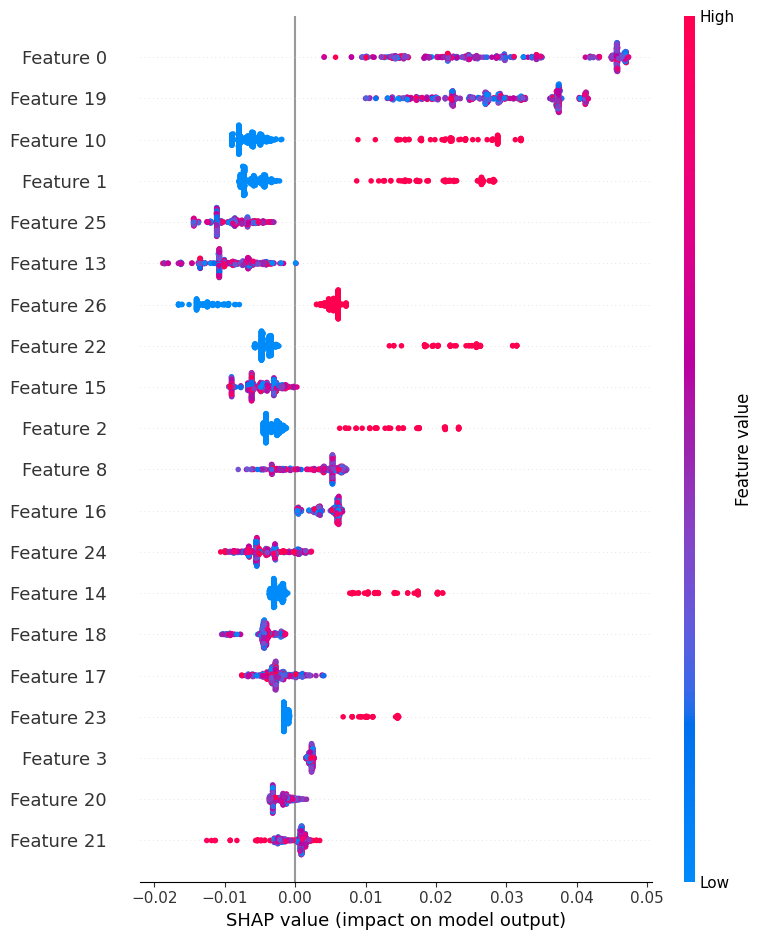

In [ ]:
import shap

model = lgb.train(best_params, lgb.Dataset(X_train, label=y_train))

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

In [ ]:
import os
print(os.listdir())  # Lists all files in the current directory

['.config', 'catboost_info', 'early_menopause_risk_dataset_updated.csv', 'lightgbm_model.pkl', 'sample_data']


In [ ]:
!pip install streamlit

import streamlit as st
import numpy as np
import joblib  # Save & load models

# Load trained model
model = joblib.load("lightgbm_model.pkl")

st.title("Early Menopause Risk Predictor")

age = st.slider("Age", 20, 50)
bmi = st.number_input("BMI", min_value=15.0, max_value=40.0)
stress = st.slider("Stress Level (1-10)", 1, 10)
hormonal = st.slider("Hormonal Level (1-10)", 1, 10)

if st.button("Predict Risk"):
    input_features = np.array([[age, bmi, stress, hormonal]])
    risk = model.predict(input_features)[0]

    st.subheader("Prediction: " + ("High Risk" if risk > 0.5 else "Low Risk"))

    if risk > 0.5:
        st.warning("Consult a doctor & follow a healthy lifestyle!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


2025-03-06 12:33:55.736 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.902 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-06 12:33:55.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:33:55.915 Session state does not 

In [ ]:
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st

st.title("Hello, Streamlit in Google Colab! 🎈")
st.write("This is a simple Streamlit app running inside Google Colab.")

Writing app.py


In [ ]:
!pip install streamlit pyngrok
!ngrok config add-authtoken 2twYrICxQf2d2RYEkW5021R90eE_kQc5UW2WuP8y3PgcvGHU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
